In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso

In [2]:
data = pd.read_csv('supermarket_sales.csv')
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,01-05-2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,03-08-2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,03-03-2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,02-08-2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [4]:
scaled_features = data.copy()
 
col_names = ['Quantity', 'gross income']
features = scaled_features[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
 
scaled_features[col_names] = features

In [5]:
X = scaled_features[['Quantity']]
y = scaled_features[['gross income']]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

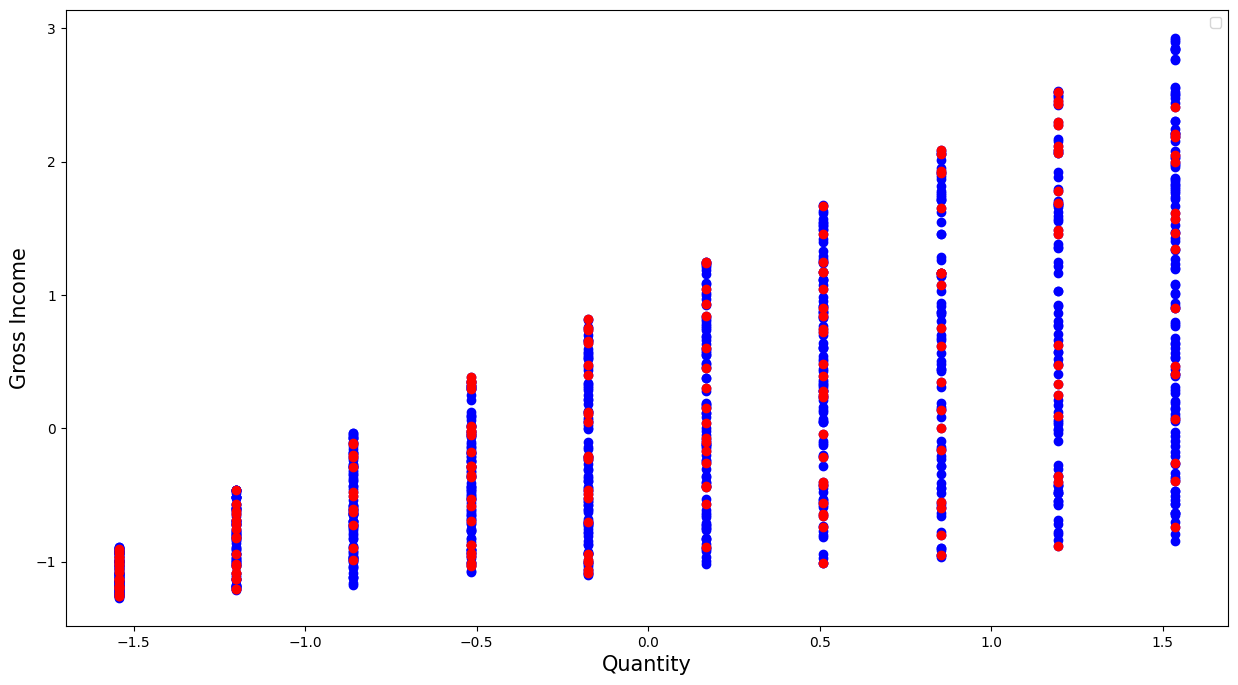

In [6]:
plt.figure(figsize=(15,8))
plt.scatter(X,y, c='b', marker='o', label='Full Data Points')
plt.scatter(x_test, y_test, c="r", marker='o', label='Test Data points')
plt.xlabel('Quantity', fontsize=15)
plt.ylabel('Gross Income', fontsize=15)
plt.legend('')

## Normal Reg vs SGD Reg

In [7]:
reg = LinearRegression()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_test)

# Get the parameters
intercept_reg = reg.intercept_
coeff_reg = reg.coef_[0]

mse_reg = mean_squared_error(y_test, y_pred)
r2_reg = r2_score(y_test, y_pred)


Linear Reg : Intercept: [-0.01593589], Coefficient: [0.69434741]
r2=0.5068319205847325 mse=0.5050361674837425
sgd reg : m=[-0.01550831] c=[0.69290136]
r2=0.5067387337972211 mse=0.5051315968109622


D:\python_juypter\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


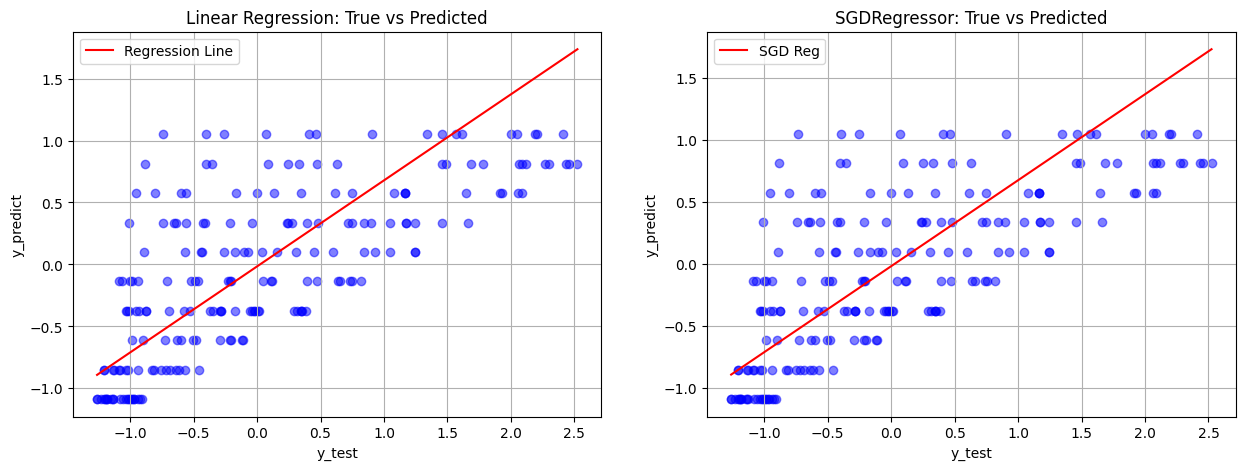

In [8]:
print(f"Linear Reg : Intercept: {intercept_reg}, Coefficient: {coeff_reg}")
print(f'r2={r2_reg} mse={mse_reg}')

# Generate the regression line
y_test_dim = y_test['gross income'].values.reshape(-1,1)
x_range = np.linspace(min(y_test_dim), max(y_test_dim), 100)
reg_line = intercept_reg + coeff_reg * x_range

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
# Plot the data points and regression line
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(x_range, reg_line, color='red', label='Regression Line')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.title('Linear Regression: True vs Predicted')
plt.legend()
plt.grid(True)

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=10)
sgd_reg.fit(x_train, y_train)
pred = sgd_reg.predict(x_test)

r2 = r2_score(y_test, pred)
mse = mean_squared_error(y_test, pred)
print(f'sgd reg : m={sgd_reg.intercept_} c={sgd_reg.coef_}')
print(f'r2={r2} mse={mse}')

# Generate the regression line
y_test_dim = y_test['gross income'].values.reshape(-1,1)
x_range = np.linspace(min(y_test_dim), max(y_test_dim), 100)
reg_line = sgd_reg.intercept_ + sgd_reg.coef_ * x_range

plt.subplot(1,2,2)
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot(x_range, reg_line, color='red', label='SGD Reg')
plt.xlabel('y_test')
plt.ylabel('y_predict')
plt.title('SGDRegressor: True vs Predicted')
plt.legend()
plt.grid(True)
plt.show()


## Plot - Actual VS Predict 

[0.00153808] [-0.10949345]
[0.00136682] [-0.17213329]


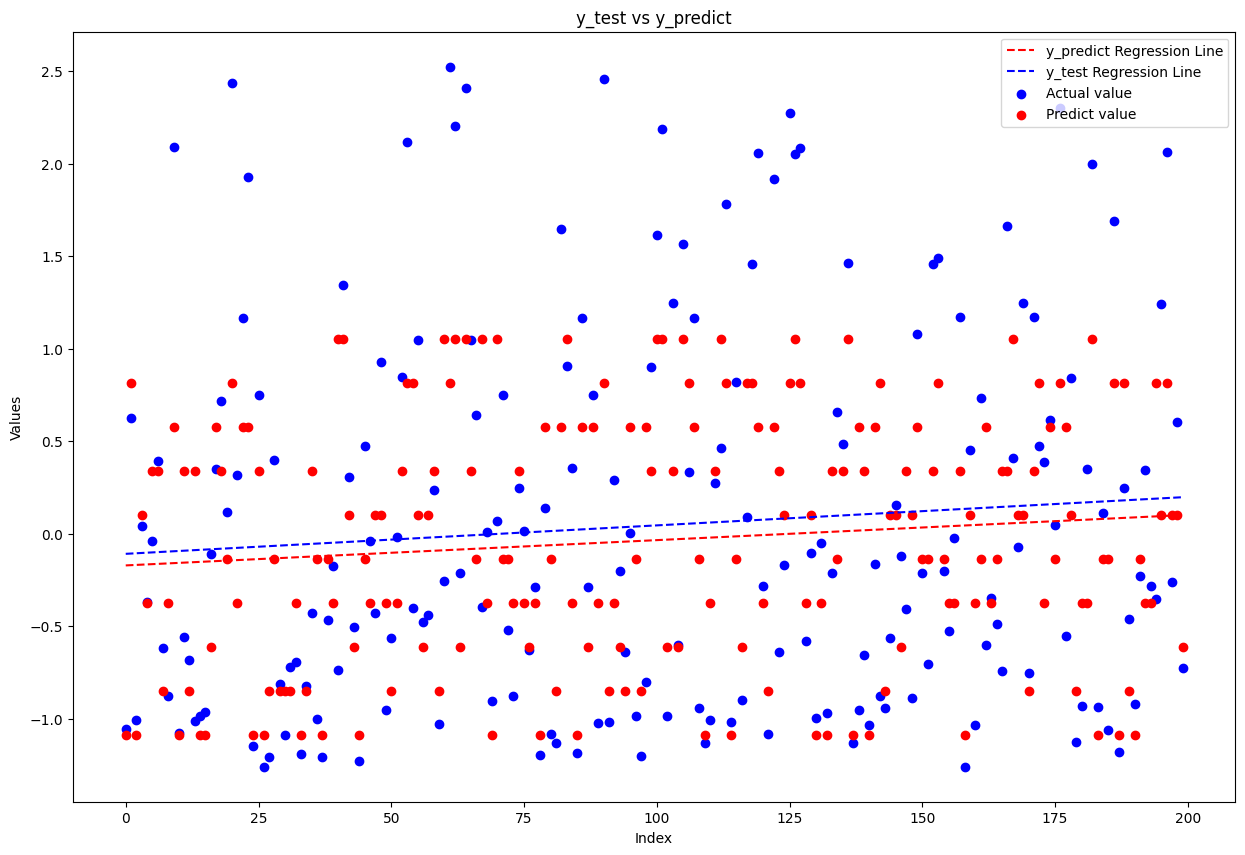

In [9]:
x = range(len(y_test))
# x = y_test[:200].values.ravel()

# Fit regression lines
slope_predict, intercept_predict = np.polyfit(x, y_pred, 1)  # For y_predict
slope_test, intercept_test = np.polyfit(x, y_test, 1)  # For y_test
print(slope_test, intercept_test)
print(slope_predict, intercept_predict)

# Generate regression line values
reg_line_predict = [slope_predict * xi + intercept_predict for xi in x]
reg_line_test = [slope_test * xi + intercept_test for xi in x]

plt.figure(figsize=(15,10))
plt.plot(x, reg_line_predict, color='red', linestyle='--', label='y_predict Regression Line')
plt.plot(x, reg_line_test, color='blue', linestyle='--', label='y_test Regression Line')

plt.scatter(x, y_test, c='b', label='Actual value')
plt.scatter(x, y_pred, c='r', label='Predict value')

plt.xlabel('Index')
plt.ylabel('Values')
plt.title('y_test vs y_predict')
plt.legend()
# plt.savefig('f1')
plt.show()

## Cross Validation

In [10]:
lr_model = LinearRegression()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(lr_model, X, y,scoring='neg_mean_squared_error', cv=kf)

In [11]:
for fold, score in enumerate(scores):
    print(f"KFold {fold+1}: {score}")
     
print(f"Mean accuracy: {scores.mean()}")
print(f"Standard deviation: {scores.std()}")

KFold 1: -0.5314822890693292
KFold 2: -0.4789278233210696
KFold 3: -0.5607602732870043
KFold 4: -0.41893900449150806
KFold 5: -0.5382101217235078
Mean accuracy: -0.5056639023784838
Standard deviation: 0.050985255533599845


In [12]:
score = cross_val_score(LinearRegression(), X,y, scoring='neg_mean_squared_error', cv=5)
print(score.mean())

-0.5076538330095058


## Grid Search

In [13]:

parameters = {'alpha' :[1e-3,1e-7,1e-5,1e-2,1e-4,1e-1]}
# parameters = {'alpha' :[1e-3,1e-7,1e-5,1e-1,2,5,10,20,30,50,70,80,100]}
reg_model = GridSearchCV(Ridge(), parameters, scoring='neg_mean_squared_error',cv=5)
# reg_model = RandomizedSearchCV(Ridge(), parameters, scoring='neg_mean_squared_error',cv=5)
reg_model.fit(x_train, y_train)
# print(reg_model.best_params_)
print(reg_model.best_estimator_)
print(reg_model.best_score_)
# print(reg_model.cv_results_)

lasso_reg = GridSearchCV(Lasso(), parameters, scoring='neg_mean_squared_error',cv=5)
lasso_reg.fit(x_train, y_train)
print(lasso_reg.best_params_)
print(lasso_reg.best_score_)

Ridge(alpha=0.1)
-0.5037931151567369
{'alpha': 1e-07}
-0.5037931842752776


## Ridge Regression

In [15]:
ridge_reg = Ridge(alpha=0.1)
ridge_reg.fit(x_train, y_train)
pred = ridge_reg.predict(x_test)
print(f'Ridge - mse : {mean_squared_error(y_test, pred)}')
# sns.distplot(pred)

Ridge - mse : 0.5050455807021095


In [16]:
reg = SGDRegressor(penalty='l2',max_iter=1000, tol=1e-3, eta0=0.1, random_state=52)
reg.fit(x_train, y_train)
predtt = reg.predict(x_test)
print(f'SGD with Ridge - mse : {mean_squared_error(y_test, predtt)}')

SGD with Ridge - mse : 0.4972763595334456


D:\python_juypter\venv\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Lasso Regression

In [17]:
lasso_pred = lasso_reg.predict(x_test)
print(f'lasso mse : {mean_squared_error(y_test, lasso_pred)}')
# sns.distplot(lasso_pred)

lasso mse : 0.5050361783229078


## Decision Tree

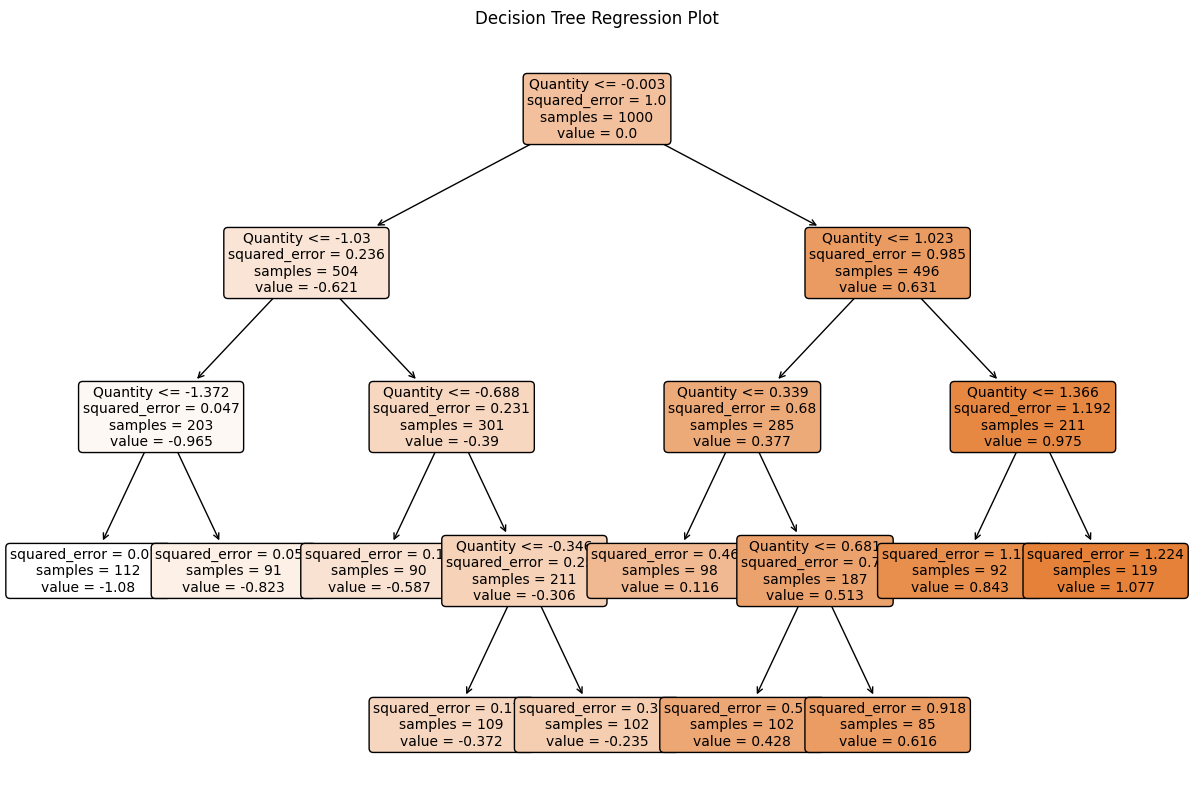

In [18]:
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X, y)

plt.figure(figsize=(15, 10))
plot_tree(regressor, feature_names=X.columns, filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Regression Plot")
plt.show()

In [19]:
dt_model = DecisionTreeRegressor()

kf = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(dt_model, X, y, cv=kf)

dt_model.fit(x_train, y_train)
y_prediction = regressor.predict(x_test)

mse = mean_squared_error(y_test, y_prediction)
r2_score = r2_score(y_test, y_prediction)
print(f'r2 = {r2_score} mse = {mse}')

r2 = 0.5084320753764093 mse = 0.5033975049727232


In [20]:
for fold, score in enumerate(scores):
    print(f"KFold {fold+1}: {score}")
     
print(f"Mean accuracy: {scores.mean()}")
print(f"Standard deviation: {scores.std()}")

KFold 1: 0.49658539150019676
KFold 2: 0.5333935425109799
KFold 3: 0.374903587668421
KFold 4: 0.5625961791042435
KFold 5: 0.44928158531438267
Mean accuracy: 0.48335205721964475
Standard deviation: 0.0661525053848376
